<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions

What about this idea? We make a csv of the file I have so far and you apply Trees to that to figure out the pitfuls of the new code and in the mena time i will work on improving the metrics of the data?

How to get a list of alla predicted values and graph it in plotly with actual

Substitute avg sales data or anticipated date based on previous months for covid

Why are R2 and other metrics so low?

What about Jared's ide aof training on 80%+ of data, derviving Features then subsetting original data set by thise featuyres and running lasso or a different regress on that new dataset?

How to get teh model , the equation of the line?

Why is changing matplot x & ya axis difficult?

# The Assignment

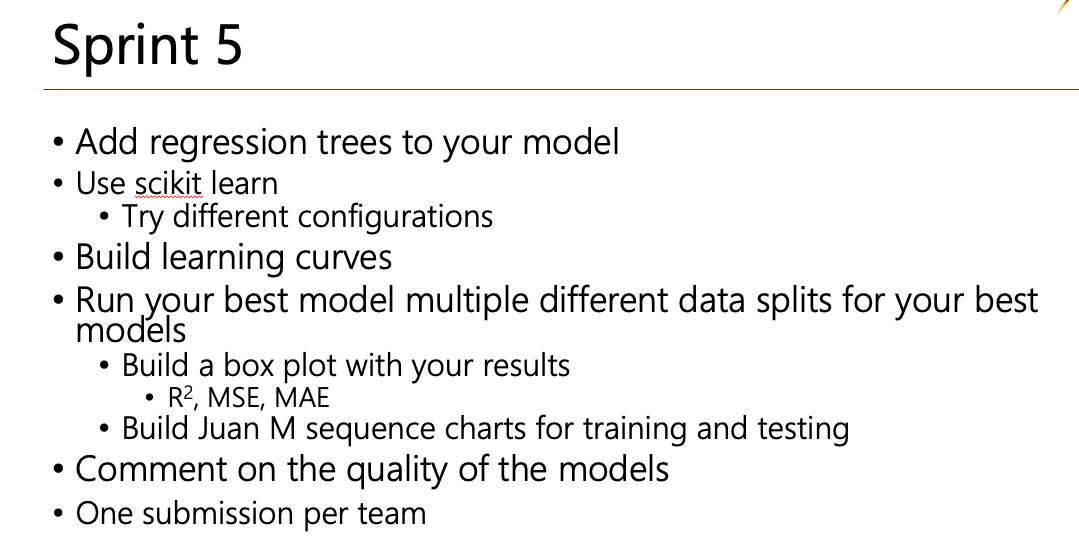

## Plan

Run through code with original data and no cv

Once succesfulk apply cv and re run

Run through with adjeusted code adj quantity anc covid dummy

Run through code with augment data

Have the vareious version of the coide loaded  in cells above and just be able to plug them in. 

Run all of the various data sets prediction inthe same line chart

#Library

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import pyplot
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

import datetime as dt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange

from yellowbrick.features import ParallelCoordinates
# use automatically configured the lasso regression algorithm
from sklearn.linear_model import LassoCV
import plotly.express as px
from sklearn import metrics
import urllib

Create Plots

In [2]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,3)
    ax[0].set_xlim(0,3)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

In [3]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

In [4]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation:', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation:', np.std(Test_R2))

In [ ]:
 # Brian can you add MAE;'s to this?  We are suppossed ot report 
 # on R2, MSE ,a dn MAE.  This only does tow of them

...
# my verseion with MAE

def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    Train_Mae = [] #Empty list to store MAEs for training set
    Test_MAE = []  #Empty list to Store MAEs for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2) 

        # Brian can figure out how to insert MAE 
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation:', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation:', np.std(Test_R2))

# Data


*   Original Data:
          date conv to Ordianl
*   Adjusted Data:
          date converted to ordinal
          dummy variable for covi added
    Augmented Data:
          date DROPPED
          covid dummy added
          adjusted quatnted substituted
          rows increased from 60 to 1700
          



### Original data

Date converted to ordinal


In [26]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(5)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.

In [27]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

### Scale Orig Data

In [28]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [29]:
cols =data.columns.difference(['date'])

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
data[cols] = sc.fit_transform(data[cols])

In [33]:
data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,736330,1.539880,0.703768,-1.632022,-0.889269,-0.528241,-1.103651,-0.287798,-1.101781,0.016399,-0.966155,-0.621275,-0.553653,-0.536381,-0.598653,-0.844779,1.901225,0.728906,-0.754819,2.388963,-0.944942,-0.457605,-0.111201,-0.687592,-1.480974,-2.156877,-0.465022,-0.035719,-0.466215,0.433547,2.497895,-0.991226,-1.232210,-1.831242,-0.868114,-0.447471,0.574186,1.565983,-0.307755,-0.863563,...,-1.053966,0.078346,-1.394121,1.266696,-1.108110,-0.624929,-0.245088,-0.776366,-0.902077,0.527733,-1.466087,1.210525,-0.725630,-0.460762,0.388959,0.732856,0.044353,1.414693,-0.772702,1.753148,-0.299252,-0.934209,-0.431109,-0.055554,0.038088,0.145483,-1.766711,0.619969,-1.080612,-1.414953,-0.862847,-1.618821,-0.829065,-0.536741,-1.656385,0.501004,-1.506361,-0.394158,1.357242,0.380225
1,736361,0.110421,0.325418,-1.579833,0.226266,0.580418,-0.737166,1.359021,-0.859717,1.388236,-0.090003,0.066074,0.352555,-0.137113,0.353344,-0.470100,1.784625,0.728906,-0.754819,2.073044,-1.130383,-0.363636,-0.007877,-0.608165,-0.985189,-1.363913,-0.365731,-0.403188,1.136662,-1.261025,-0.744487,-1.477211,-1.406964,-0.376515,-0.829790,-1.576824,-0.897072,0.109178,0.761352,-0.959579,...,0.292836,1.272364,-0.174010,2.245952,0.223510,-0.800223,-0.470325,-0.634713,-1.035486,0.026740,-1.331254,1.218904,-1.084725,-0.602152,-0.224741,-0.774801,-0.892580,0.473138,-1.460572,1.138999,-0.709756,-0.461524,0.379834,0.724051,0.027079,1.487196,-0.727822,1.731090,-0.300246,-0.903358,-0.409989,-0.045720,0.038952,0.117254,-1.685606,0.597652,-1.030819,-0.653725,-0.736788,0.120324
2,736389,-1.314169,-0.250193,-1.505126,0.007910,0.163966,-0.385724,0.501915,-0.403552,0.500870,0.415460,0.612165,0.692095,0.385513,0.992317,0.124403,1.689888,0.728906,-0.754819,1.539249,-0.948358,-0.594287,-0.301490,-0.770505,-0.716289,-1.212872,-0.100955,-0.642296,0.050155,-0.751032,-0.258268,-1.308589,-0.791415,-0.659020,-0.662823,0.229459,0.304524,0.176521,-1.117497,-1.196299,...,-1.261519,-0.034381,-1.322262,0.710995,-1.107407,-0.222414,0.547229,1.285348,0.302120,1.282045,-0.130459,2.189370,0.241106,-0.778673,-0.456993,-0.632586,-1.028030,-0.035971,-1.321413,1.147133,-1.070086,-0.602985,-0.240056,-0.844457,-0.916897,0.454280,-1.396862,1.114885,-0.711088,-0.438214,0.395311,0.724021,0.027951,1.528374,-0.666388,1.712914,-0.267264,-0.394158,-0.736788,0.640126


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 942)
(17, 942)


# Orig Data Model Creation

In [36]:
LassoReg = Lasso()

## This is Orig Data 30 Split

In [ ]:
#########################
# This is 30 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

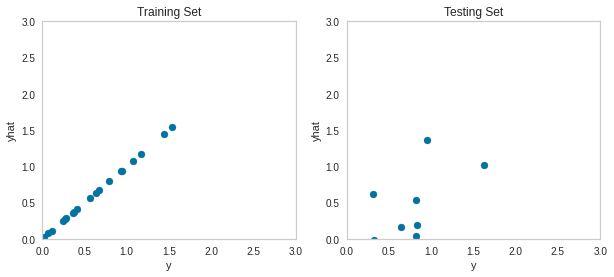

Training Metrics:
R squared: 1.0
Mean Absolute Error: 5.4875164097430115e-15
Mean Squared Error: 4.8082757577450487e-29
Root Mean Squared Error: 6.934173171867753e-15

Testing Metrics:
R squared: 0.36296930257738436
Mean Absolute Error: 0.6678009514062668
Mean Squared Error: 0.6753049480102762
Root Mean Squared Error: 0.8217694007507679


()

In [39]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

### multi Run Analysis

Train MSE median: 1.9844119697398043e-29
Test MSE median: 0.9435783441528474

Train_R2 median: 1.0
Test_R2 median: -0.26702422769527756


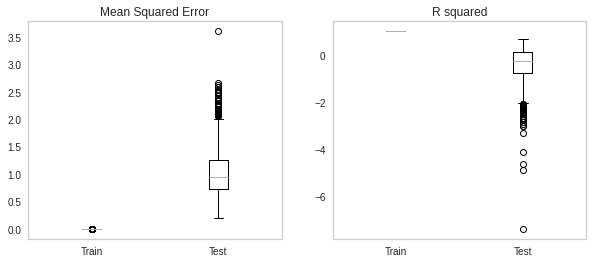

Train MSE standard deviation: 1.3236306424995895e-29
Test MSE standard deviation: 0.44325246167305393

Train_R2 standard deviation: 0.0
Test_R2 standard deviation: 0.7507611531161659


In [40]:
Multiple_Runner(LinearRegression(), X, y)

# Orig Data 40 Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)

(32, 942)
(22, 942)


In [42]:
LassoReg = Lasso()

In [ ]:
#########################
# This is 40 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

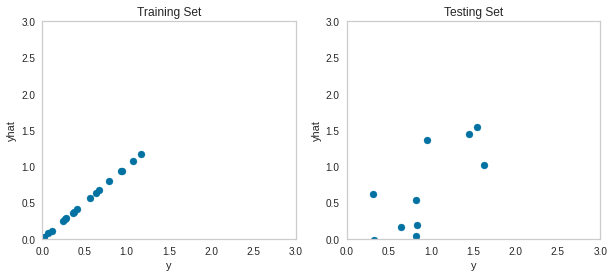

Training Metrics:
R squared: 1.0
Mean Absolute Error: 4.466235324282475e-15
Mean Squared Error: 3.230378059099955e-29
Root Mean Squared Error: 5.683641490365094e-15

Testing Metrics:
R squared: 0.5251980732392345
Mean Absolute Error: 0.5160280079048442
Mean Squared Error: 0.5218265507352112
Root Mean Squared Error: 0.7223756299427683


()

In [44]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Orig Data 10 Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
print(X_train.shape)
print(X_test.shape)

(48, 942)
(6, 942)


In [46]:
LassoReg = Lasso()

In [ ]:
#########################
# This is 10 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

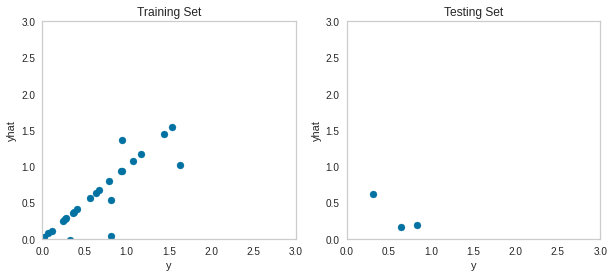

Training Metrics:
R squared: 0.7984309375398115
Mean Absolute Error: 0.17628660970752208
Mean Squared Error: 0.20809340793512687
Root Mean Squared Error: 0.45617256376850074

Testing Metrics:
R squared: 0.6540228282064067
Mean Absolute Error: 0.481809817990944
Mean Squared Error: 0.2486167558814345
Root Mean Squared Error: 0.4986148372054671


()

In [48]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Orig Data 0.05 Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)
print(X_train.shape)
print(X_test.shape)
LassoReg = Lasso()

(51, 942)
(3, 942)


In [ ]:
#########################
# This is o.05 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

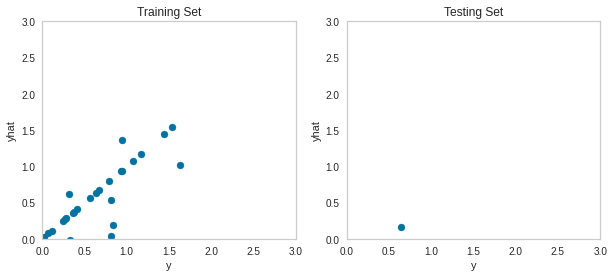

Training Metrics:
R squared: 0.7894163063284649
Mean Absolute Error: 0.19095291725357147
Mean Squared Error: 0.2079307422612232
Root Mean Squared Error: 0.45599423489910834

Testing Metrics:
R squared: 0.6570305033030621
Mean Absolute Error: 0.5380057979915284
Mean Squared Error: 0.29190542028410293
Root Mean Squared Error: 0.5402827225482071


()

In [51]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Next We Will Look at Adjusted Data :

    Adjusteed Quantity substituted
    
    Covid dummy variable added

In [56]:
ADJUSTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
ADJUSTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [57]:
#Add dummy variable for Covid or Not

ADJUSTED_data['covid'] = 0
ADJUSTED_data.at[39,'covid'] = 1

In [58]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515

In [ ]:
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

### 5% Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)
print(X_train.shape)
print(X_test.shape)
LassoReg = Lasso()

(51, 942)
(3, 942)


In [ ]:
#########################
# This is o.05 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

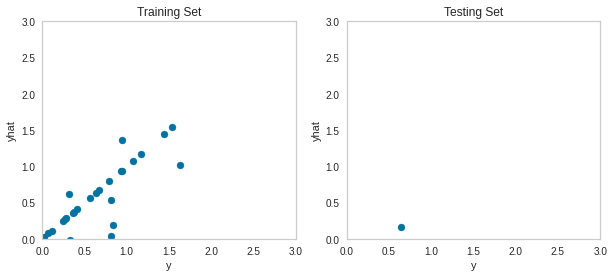

Training Metrics:
R squared: 0.7894163063284649
Mean Absolute Error: 0.19095291725357147
Mean Squared Error: 0.2079307422612232
Root Mean Squared Error: 0.45599423489910834

Testing Metrics:
R squared: 0.6570305033030621
Mean Absolute Error: 0.5380057979915284
Mean Squared Error: 0.29190542028410293
Root Mean Squared Error: 0.5402827225482071


()

In [63]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Adjusted  Data10% split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
print(X_train.shape)
print(X_test.shape)
LassoReg = Lasso()

(48, 942)
(6, 942)


In [ ]:
#########################
# This is o.10 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

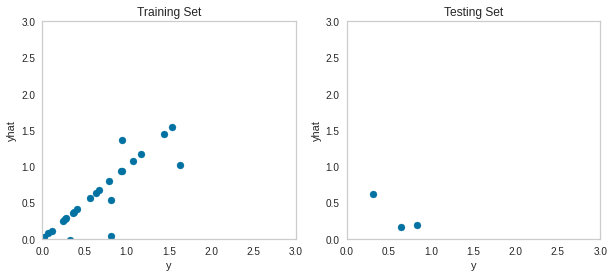

Training Metrics:
R squared: 0.7984309375398115
Mean Absolute Error: 0.17628660970752208
Mean Squared Error: 0.20809340793512687
Root Mean Squared Error: 0.45617256376850074

Testing Metrics:
R squared: 0.6540228282064067
Mean Absolute Error: 0.481809817990944
Mean Squared Error: 0.2486167558814345
Root Mean Squared Error: 0.4986148372054671


()

In [66]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Adjusted Data 20 % Split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
LassoReg = Lasso()

(43, 942)
(11, 942)


In [ ]:
#########################
# This is o.20 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

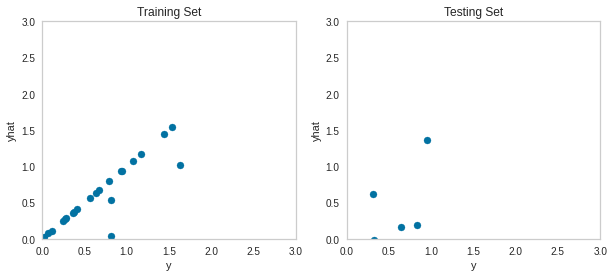

Training Metrics:
R squared: 0.9066875281045563
Mean Absolute Error: 0.09156339733674353
Mean Squared Error: 0.09692158683426105
Root Mean Squared Error: 0.3113223198459453

Testing Metrics:
R squared: 0.2108801384128196
Mean Absolute Error: 0.6741263716751598
Mean Squared Error: 0.6647778074819485
Root Mean Squared Error: 0.8153390751594998


()

In [70]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

#Adjusted Data 40% Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
LassoReg = Lasso()

(32, 942)
(22, 942)


In [ ]:
#########################
# This is o.40 Split      #
#########################


#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

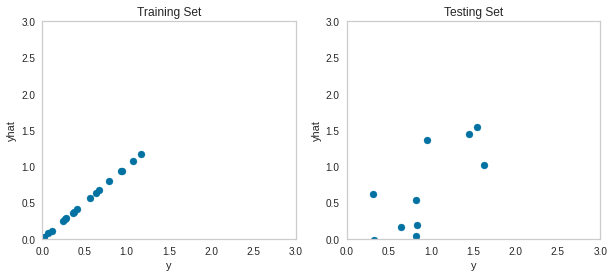

Training Metrics:
R squared: 1.0
Mean Absolute Error: 4.466235324282475e-15
Mean Squared Error: 3.230378059099955e-29
Root Mean Squared Error: 5.683641490365094e-15

Testing Metrics:
R squared: 0.5251980732392345
Mean Absolute Error: 0.5160280079048442
Mean Squared Error: 0.5218265507352112
Root Mean Squared Error: 0.7223756299427683


()

In [73]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Augmented Data we add rows by multiplying and concating

# Augmented Data

We drop the date colum

We multiply the dataframe a 1/10,ooo several times.

Substitute Adjusted Qunatity.  

Add dummy variable  for covid o|1




In [127]:
data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [ ]:

data['covid'] = 0
data.at[39,'covid'] = 1
data["Quantity_adj"] = data['Quantity']
data.at[39,'Quantity_adj'] =  -1.303515
data.drop(columns='Quantity')
# data['date'] = pd.to_datetime(data['date'])

In [129]:
# drop date column

data = data.drop(columns='date')

In [130]:
data.head(2)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,covid,Quantity_adj
0,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,0,1.503548
1,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,0,0.076213


In [ ]:
'''
AUGMENTED_data['covid'] = 0
AUGMENTED_data.at[39,'covid'] = 1
AUGMENTED_data["Quantity_adj"] = data['Quantity']
AUGMENTED_data.at[39,'Quantity_adj'] =  -1.303515
AUGMENTED_data.drop(columns='Quantity')
#AUGMENTED_data['date'] = pd.to_datetime(data['date'])

In [131]:
AUGMENTED_data = data

In [ ]:
AUGMENTED_data.head(10)

In [133]:
one = AUGMENTED_data*1.0001

In [134]:
one.head()

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,covid,Quantity_adj
0,1.503698,0.699993,112590.687643,11304.1303,1.185250e+06,3587.3587,7716.7716,229500.9478,9.557486e+05,8.971532e+05,9.132817e+05,194295.447602,502135.041483,171577.122497,45274.114459,0.069407,14754.823175,206263.192257,5.470547,2944.944465,52.195219,52.815281,102.559227,-30.20302,-28.30283,-33.10331,11.734440,1.044630e+11,1.323622e+11,1.727855e+11,1.051019e+11,8.848452e+10,8.355560e+10,5.008944e+10,9.372938e+10,3.037419e+10,3.136329e+10,1.585589e+11,1.050868e+12,104.861498,...,3.391142e+06,550938.162207,1.302695e+06,4.680899e+06,460678.063200,5.703013e+06,4.657820e+06,7.012997e+06,3.283745e+06,549843.978900,1.454817e+06,4.942476e+06,531903.377619,7.315967e+06,6.120698e+06,8.141014e+06,3.814610e+06,632450.830859,1.628122e+06,4.068428e+06,438726.136127,6.514271e+06,6.137758e+06,6.675769e+06,2.990280e+06,483496.692135,1.298942e+06,3.107095e+06,386328.181455,4.875864e+06,4.791626e+06,5.996689e+06,3.013914e+06,470588.383133,1.093929e+06,1.0001,5.0005,25.0025,0.0,1.503698
1,0.076221,0.316187,113449.438709,16188.6187,1.591138e+06,4659.4659,11529.1528,272988.2961,1.318150e+06,1.025808e+06,1.008069e+06,228382.674984,530879.245116,199751.668169,49055.507560,0.067807,14754.823175,206263.192257,5.180518,2881.968168,53.405340,54.015401,102.929324,-24.30243,-19.90199,-31.00310,10.505342,1.575012e+11,8.352353e+10,1.097017e+11,8.253362e+10,8.583375e+10,1.522243e+11,5.057211e+10,6.035455e+10,2.138457e+10,2.216586e+10,2.104844e+11,1.036280e+12,98.297282,...,4.347600e+06,677665.943418,1.864353e+06,4.354327e+06,433723.145178,5.855161e+06,4.446335e+06,6.403067e+06,3.391142e+06,550938.162207,1.302695e+06,4.680899e+06,460678.063200,5.703013e+06,4.657820e+06,7.012997e+06,3.283745e+06,549843.978900,1.454817e+06,4.942476e+06,531903.377619,7.315967e+06,6.120698e+06,8.141014e+06,3.814610e+06,632450.830859,1.628122e+06,4.068428e+06,438726.136127,6.514271e+06,6.137758e+06,6.675769e+06,2.990280e+06,483496.692135,1.298942e+06,0.0000,4.0004,24.0024,0.0,0.076221
2,-1.346393,-0.267722,114678.725426,15232.5231,1.438672e+06,5687.5687,9544.9544,354939.4904,1.083732e+06,1.100030e+06,1.083377e+06,241154.568546,568504.332749,218662.224036,55055.432393,0.066507,14754.823175,206263.192257,4.690469,2943.784349,50.435043,50.605060,102.172886,-21.10211,-18.30183,-25.40254,9.705581,1.215493e+11,9.822186e+10,1.191616e+11,9.036411e+10,9.517071e+10,1.388890e+11,5.267494e+10,1.137341e+11,2.872651e+10,2.259103e+10,1.192304e+11,1.000314e+12,94.456822,...,3.447473e+06,479023.689779,1.302991e+06,5.430785e+06,555497.448590,7.917479e+06,6.566747e+06,7.931329e+06,4.347600e+

now multiply the contents and save as a new df and stack them



In [135]:
frames = [one, AUGMENTED_data]
concated_data = pd.concat(frames)
concated_data.shape

(108, 944)

In [136]:
two = concated_data* 1.0001

In [137]:
frames = [two, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(216, 944)

In [138]:
three = concated_data * 1.001

In [139]:
frames = [three, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(432, 944)

In [140]:
four = concated_data* 0.99999

In [141]:
frames = [four, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(864, 944)

In [142]:
five = concated_data * 0.999999

In [143]:
frames = [five, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(1728, 944)

In [144]:
six = concated_data * 0.999999

In [145]:
frames = [six, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(3456, 944)

In [166]:
AUGMENTED_data = concated_data

In [167]:
AUGMENTED_data.shape

(3456, 944)

In [168]:
AUGMENTED_data.head(10)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,covid,Quantity_adj
0,1.505335,0.700755,112713.196086,11316.430175,1.186539e+06,3591.262058,7725.168117,229750.664756,9.567885e+05,8.981294e+05,9.142755e+05,194506.857918,502681.408004,171763.813302,45323.376626,0.069482,14770.877703,206487.624518,5.476499,2948.148820,52.252012,52.872749,102.670820,-30.235884,-28.333626,-33.139329,11.747208,1.045766e+11,1.325062e+11,1.729735e+11,1.052162e+11,8.858080e+10,8.364652e+10,5.014395e+10,9.383136e+10,3.040724e+10,3.139742e+10,1.587314e+11,1.052011e+12,104.975597,...,3.394832e+06,551537.630760,1.304112e+06,4.685992e+06,461179.320929,5.709219e+06,4.662888e+06,7.020628e+06,3.287318e+06,550442.256886,1.456400e+06,4.947854e+06,532482.134674,7.323928e+06,6.127358e+06,8.149873e+06,3.818761e+06,633138.992272,1.629894e+06,4.072855e+06,439203.508253,6.521359e+06,6.144437e+06,6.683033e+06,2.993533e+06,484022.778513,1.300355e+06,3.110476e+06,386748.540058,4.881169e+06,4.796840e+06,6.003213e+06,3.017193e+06,471100.424150,1.095119e+06,1.001188,5.005941,25.029705,0.0,1.505335
1,0.076304,0.316531,113572.881548,16206.233323,1.592869e+06,4664.535803,11541.697519,273285.331067,1.319584e+06,1.026924e+06,1.009166e+06,228631.175162,531456.887826,199969.015327,49108.884211,0.067881,14770.877703,206487.624518,5.186155,2885.104000,53.463450,54.074174,103.041320,-24.328873,-19.923645,-31.036834,10.516773,1.576726e+11,8.361441e+10,1.098211e+11,8.262342e+10,8.592714e+10,1.523899e+11,5.062714e+10,6.042022e+10,2.140784e+10,2.218998e+10,2.107135e+11,1.037407e+12,98.404238,...,4.352330e+06,678403.302800,1.866382e+06,4.359065e+06,434195.073615,5.861532e+06,4.451173e+06,6.410034e+06,3.394832e+06,551537.630760,1.304112e+06,4.685992e+06,461179.320929,5.709219e+06,4.662888e+06,7.020628e+06,3.287318e+06,550442.256886,1.456400e+06,4.947854e+06,532482.134674,7.323928e+06,6.127358e+06,8.149873e+06,3.818761e+06,633138.992272,1.629894e+06,4.072855e+06,439203.508253,6.521359e+06,6.144437e+06,6.683033e+06,2.993533e+06,484022.778513,1.300355e+06,0.000000,4.004753,24.028517,0.0,0.076304
2,-1.347858,-0.268013,114803.505836,15249.097408,1.440237e+06,5693.757269,9555.340139,355325.695381,1.084912e+06,1.101227e+06,1.084555e+06,241416.965653,569122.914820,218900.147520,55115.337483,0.066579,14770.877703,206487.624518,4.695573,2946.987442,50.489921,50.660123,102.284059,-21.125071,-18.321744,-25.430180,9.716141,1.216816e+11,9.832873e+10,1.192913e+11,9.046243e+10,9.527426e+10,1.390401e+11,5.273226e+10,1.138579e+11,2.875777e+10,2.261561e+10,1.193602e+11,1.001402e+12,94.559599,...,3.451224e+06,479544.909142,1.304409e+06,5.436694e+06,556101.878043,7.92

Now our dataset has almost 60x the observations

In [176]:
feature_names = list(AUGMENTED_data.columns.values)


In [ ]:
feature_names 

# Augemted  Data  5% split

In [169]:
AUGMENTED_data.shape

(3456, 944)

In [170]:
y = AUGMENTED_data['Quantity']
X = AUGMENTED_data.loc[: ,AUGMENTED_data.columns != 'Quantity']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)
print(X_train.shape)
print(X_test.shape)
LassoReg = Lasso()

(3283, 943)
(173, 943)


In [172]:
AUGMENTED_data.shape

(3456, 944)

In [164]:

#Training the model
#LinearReg = LinearRegression(normalize=True) #Creates the function
LassoReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LinearReg.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Quantity_adj
- covid
Feature names seen at fit time, yet now missing:
- date




ValueError: ignored

ValueError: ignored

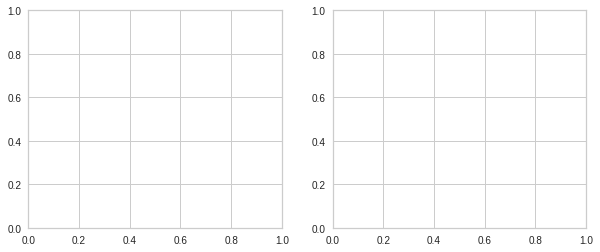

In [165]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Graphs